<h2 style="color:blue" align="center">Handwritten digits classification using ANN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

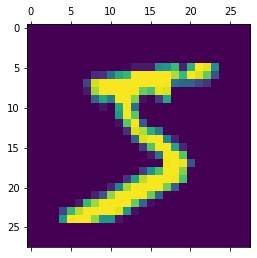

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

# <h3 style='color:purple'>Using ANN for classification</h3>

In [11]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2730 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0853 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9843


In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9719


[0.09004843980073929, 0.9718999862670898]

# Callbacks

In [16]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

# ModelCheckpoint

In [17]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
checkpoint = EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.1)

In [20]:
model.fit(X_train_flattened, y_train, epochs=50, batch_size=128, validation_data=(X_test_flattened,y_test), callbacks=[checkpoint])

Epoch 1/50
469/469 [==============================] - 4s 6ms/step - loss: 0.3850 - accuracy: 0.8935 - val_loss: 0.2086 - val_accuracy: 0.9413
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1846 - accuracy: 0.9466 - val_loss: 0.1589 - val_accuracy: 0.9516
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1411 - accuracy: 0.9597 - val_loss: 0.1286 - val_accuracy: 0.9619
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1133 - accuracy: 0.9672 - val_loss: 0.1127 - val_accuracy: 0.9659


In [21]:
# accuracy on validation set

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9659


[0.11272529512643814, 0.9659000039100647]

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.9538


[0.16400514543056488, 0.9538000226020813]